 Exploratory Data Analysis (EDA):

In [ ]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('glass.xlsx',sheet_name='glass')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
print(df.head())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [4]:
# Check for missing values in each column
print(df.isnull().sum())

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
# Check for outliers in all columns
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        filter = (df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 *IQR)
        print(f"Outliers in {column}:")
        print(df.loc[~filter])

Outliers in RI:
          RI     Na    Mg    Al     Si     K     Ca    Ba    Fe  Type
47   1.52667  13.99  3.70  0.71  71.57  0.02   9.82  0.00  0.10     1
50   1.52320  13.72  3.72  0.51  71.75  0.09  10.06  0.00  0.16     1
56   1.51215  12.99  3.47  1.12  72.98  0.62   8.35  0.00  0.31     1
103  1.52725  13.80  3.15  0.66  70.57  0.08  11.64  0.00  0.00     2
104  1.52410  13.83  2.90  1.17  71.15  0.08  10.79  0.00  0.00     2
105  1.52475  11.45  0.00  1.88  72.19  0.81  13.24  0.00  0.34     2
106  1.53125  10.73  0.00  2.10  69.81  0.58  13.30  3.15  0.28     2
107  1.53393  12.30  0.00  1.00  70.16  0.12  16.19  0.00  0.24     2
110  1.52664  11.23  0.00  0.77  73.21  0.00  14.68  0.00  0.00     2
111  1.52739  11.02  0.00  0.75  73.08  0.00  14.96  0.00  0.00     2
112  1.52777  12.64  0.00  0.67  72.02  0.06  14.40  0.00  0.00     2
131  1.52614  13.70  0.00  1.36  71.24  0.19  13.44  0.00  0.10     2
170  1.52369  13.44  0.00  1.58  72.22  0.32  12.24  0.00  0.00     5
184 

In [6]:
# Handling outliers can be tricky as it depends on the nature of the data. One common method is to replace outliers with the median. Here we use the IQR method to detect and replace outliers.
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        filter = (df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 *IQR)
        df.loc[~filter, column] = df[column].median()

In [7]:
# Summary statistics
print(df.describe())

               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.517881   13.428738    2.684533    1.383692   72.705093    0.415070   
std      0.001877    0.662438    1.442408    0.338015    0.535759    0.259124   
min      1.512990   11.560000    0.000000    0.560000   71.150000    0.000000   
25%      1.516558   12.962500    2.115000    1.202500   72.380000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.552500   
75%      1.518503   13.797500    3.600000    1.560000   73.067500    0.600000   
max      1.523000   15.150000    4.490000    2.270000   73.880000    1.100000   

               Ca     Ba          Fe        Type  
count  214.000000  214.0  214.000000  214.000000  
mean     8.644393    0.0    0.038832    2.102804  
std      0.587123    0.0    0.071359    1.274043  
min      6.930000    0.0    0.000000    1.000000  
25%      8.2850

Data Visualization:

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

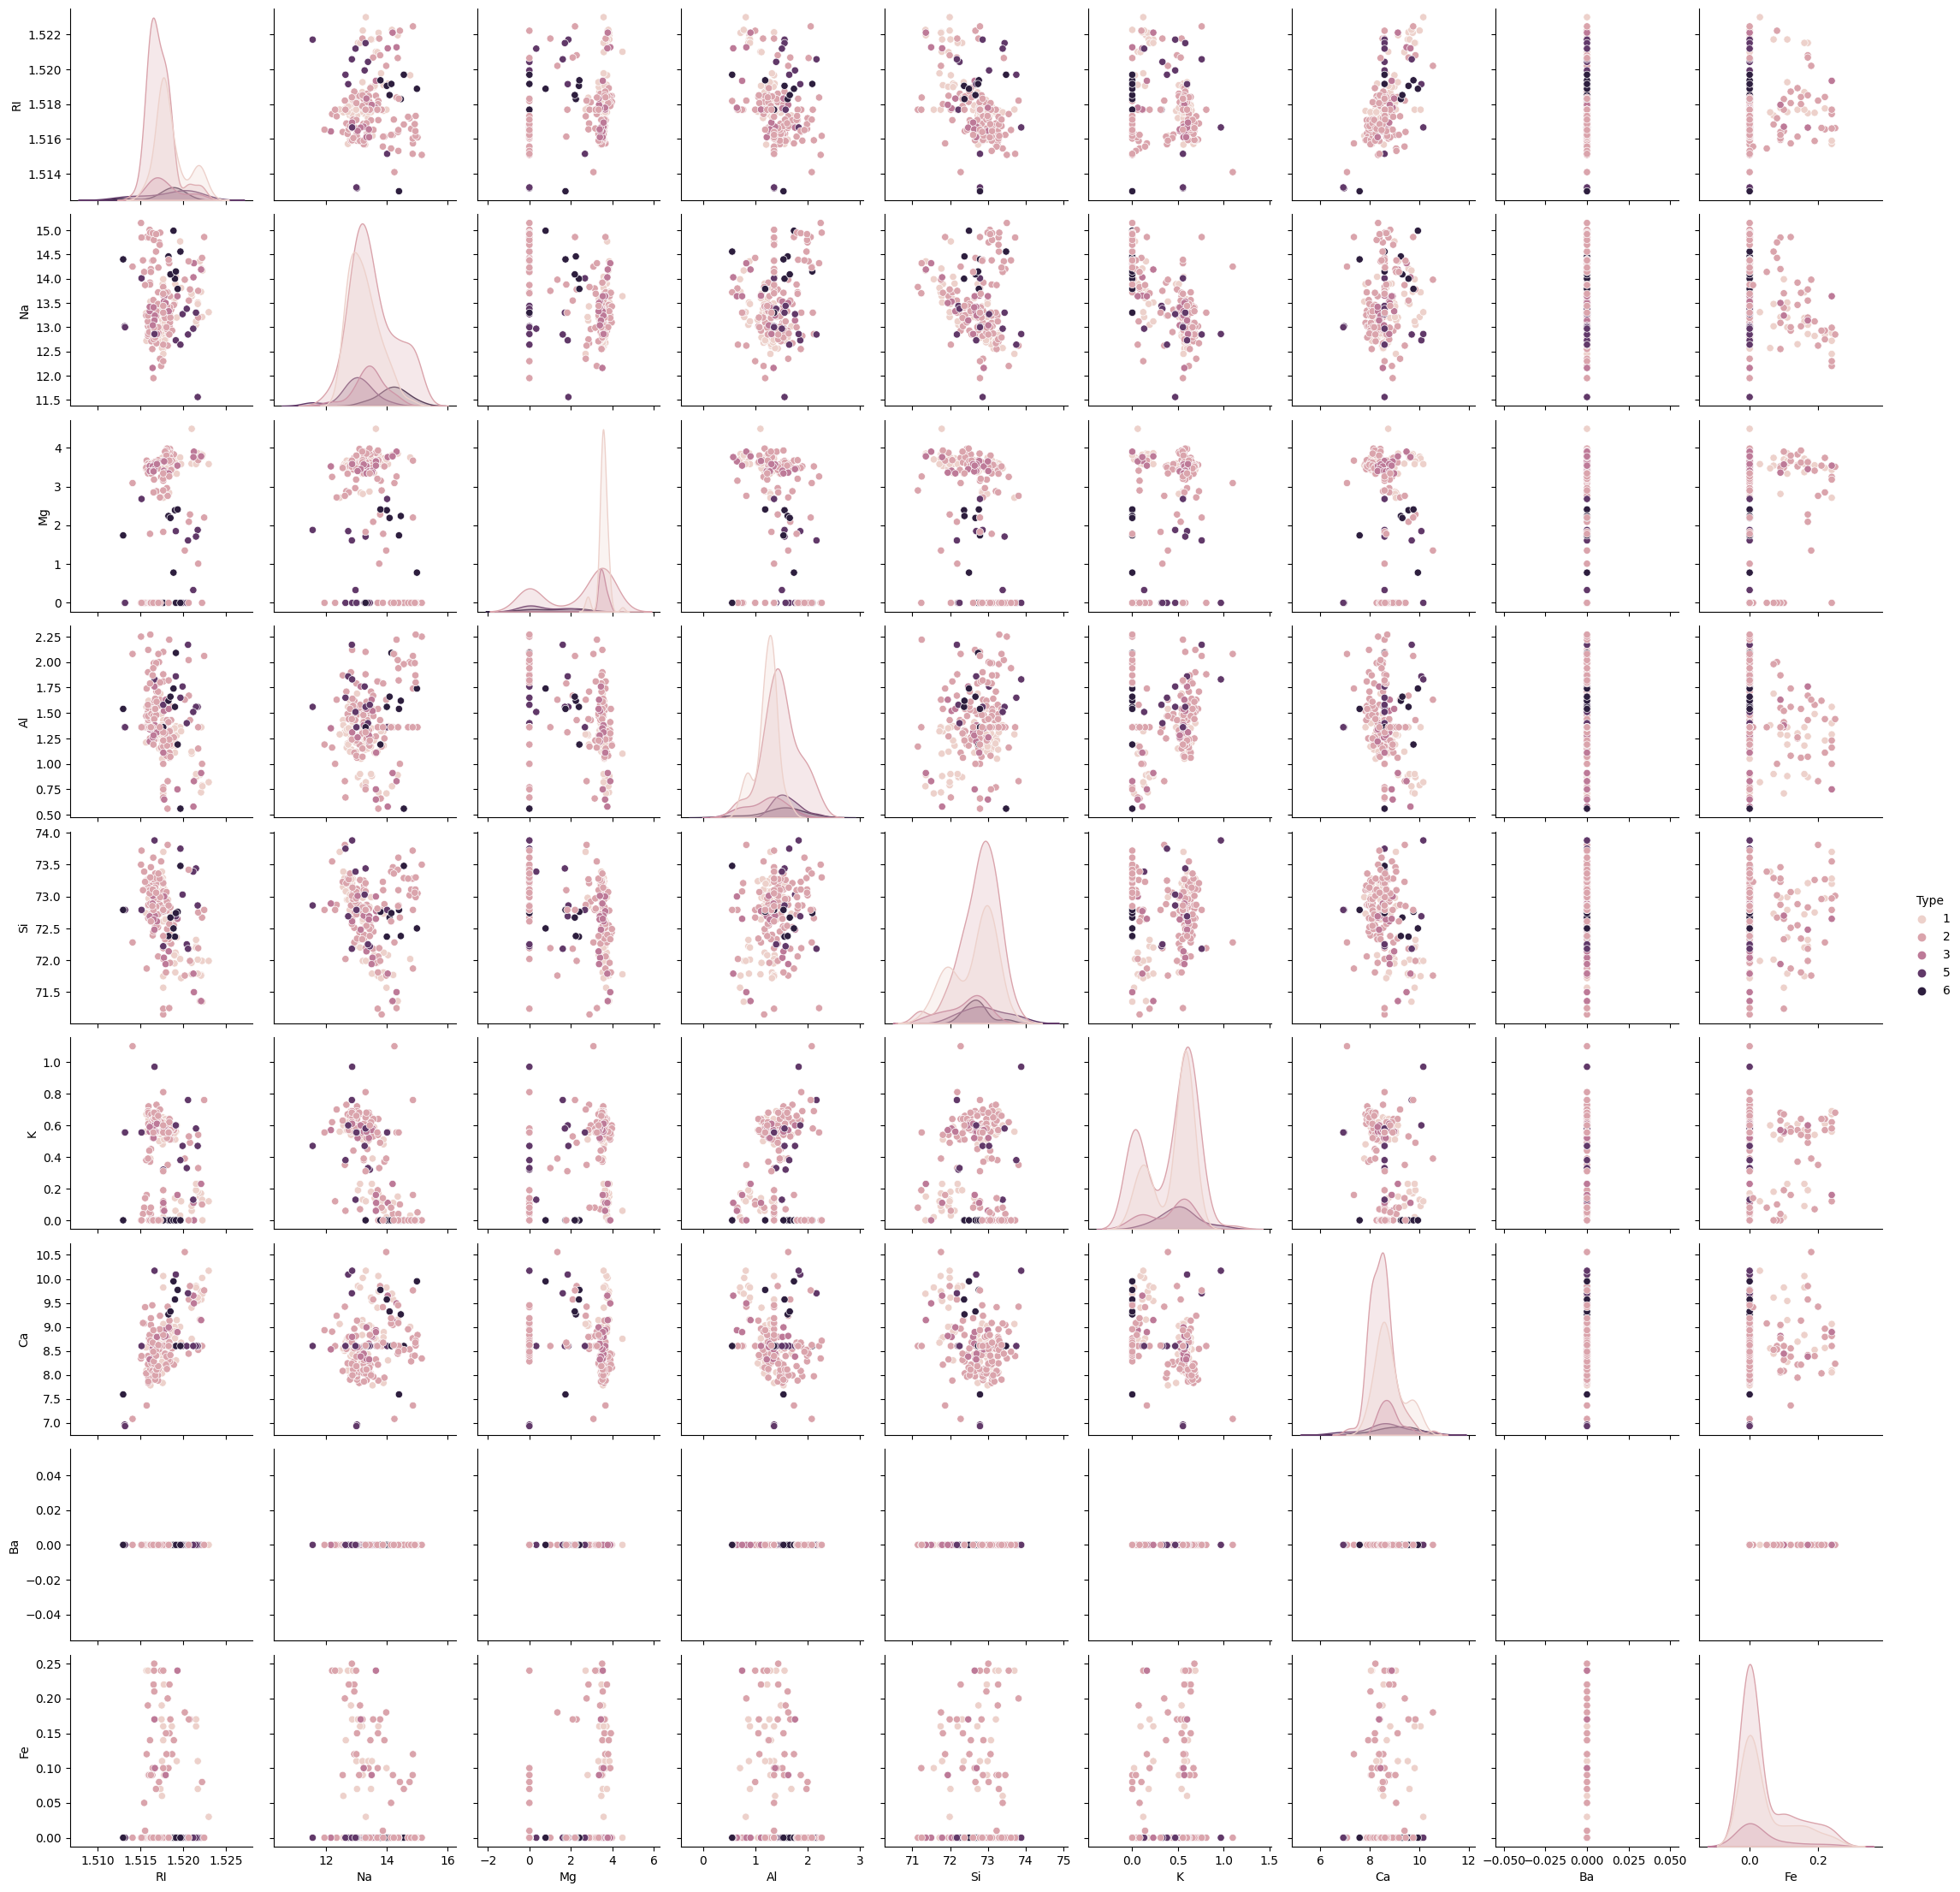

In [11]:
sns.pairplot(df, hue='Type')
plt.show()

In [13]:
# Apply feature scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.drop('Type', axis=1))
data_scaled = pd.DataFrame(data_scaled, columns=df.columns[:-1])
data_scaled['Type'] = df['Type']

In [14]:
# 4. Random Forest Model Implementation
X = data_scaled.drop('Type', axis=1)
y = data_scaled['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.813953488372093
Precision: 0.8171035233724819
Recall: 0.813953488372093
F1 Score: 0.8086747877445551


In [25]:
# 5. Bagging and Boosting Methods
bagging = BaggingClassifier()
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)

In [26]:
boosting = AdaBoostClassifier()
boosting.fit(X_train, y_train)
y_pred_boosting = boosting.predict(X_test)

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [27]:
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("Boosting Accuracy:", accuracy_score(y_test, y_pred_boosting))

Bagging Accuracy: 0.7674418604651163
Boosting Accuracy: 0.6511627906976745
